In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import timedelta

In [ ]:
xls = pd.ExcelFile("INRIX device count by county_071322.xlsx")
device_df = pd.read_excel(xls, 'National Device Panel Size')
df2 = pd.read_excel(xls, 'CO-EST2021-POP')

In [54]:
visits_df = pd.DataFrame().assign(Date=device_df['Date'], Unique_Devices=device_df['Unique Devices'])

In [55]:
cur_date = pd.to_datetime('2020-07-01')
visits_df['interpolation factor'] = visits_df['Date']-cur_date

In [56]:
visits_df['interpolation factor'] = ((visits_df['Date'] - cur_date).dt.days)/365

In [57]:
us_pop_2020 = 331501080
us_pop_2021 = 331893745
visits_df['interpolated population'] = (us_pop_2021-us_pop_2020)* visits_df['interpolation factor'] + us_pop_2020

In [58]:
visits_df['interpolated population'] = visits_df['interpolated population'].astype('int64')

In [61]:
visits_df['SumPop/SumDevices'] = visits_df['interpolated population']/visits_df['Unique_Devices']

In [63]:
visits_df

,Date,Unique_Devices,interpolation factor,interpolated population,SumPop/SumDevices
0,2020-10-01,25204444,0.252055,331600053,13.156412
1,2020-10-02,27069081,0.254795,331601128,12.250180
2,2020-10-03,30126289,0.257534,331602204,11.007071
3,2020-10-04,27928919,0.260274,331603280,11.873115
4,2020-10-05,30605973,0.263014,331604356,10.834629
...,...,...,...,...,...
360,2021-09-26,28559160,1.238356,331987339,11.624548
361,2021-09-27,28383915,1.241096,331988414,11.696357
362,2021-09-28,28422271,1.243836,331989490,11.680611
363,2021-09-29,28120455,1.246575,331990566,11.806017


In [74]:
Average_SumPop_SumDevices = visits_df['SumPop/SumDevices'].mean()
print('Average SumPop/SumDevices: '+ str(Average_SumPop_SumDevices))

Average SumPop/SumDevices: 10.33559376325629


(-0.5, 364.5, 0.0, 15.75872021372234)

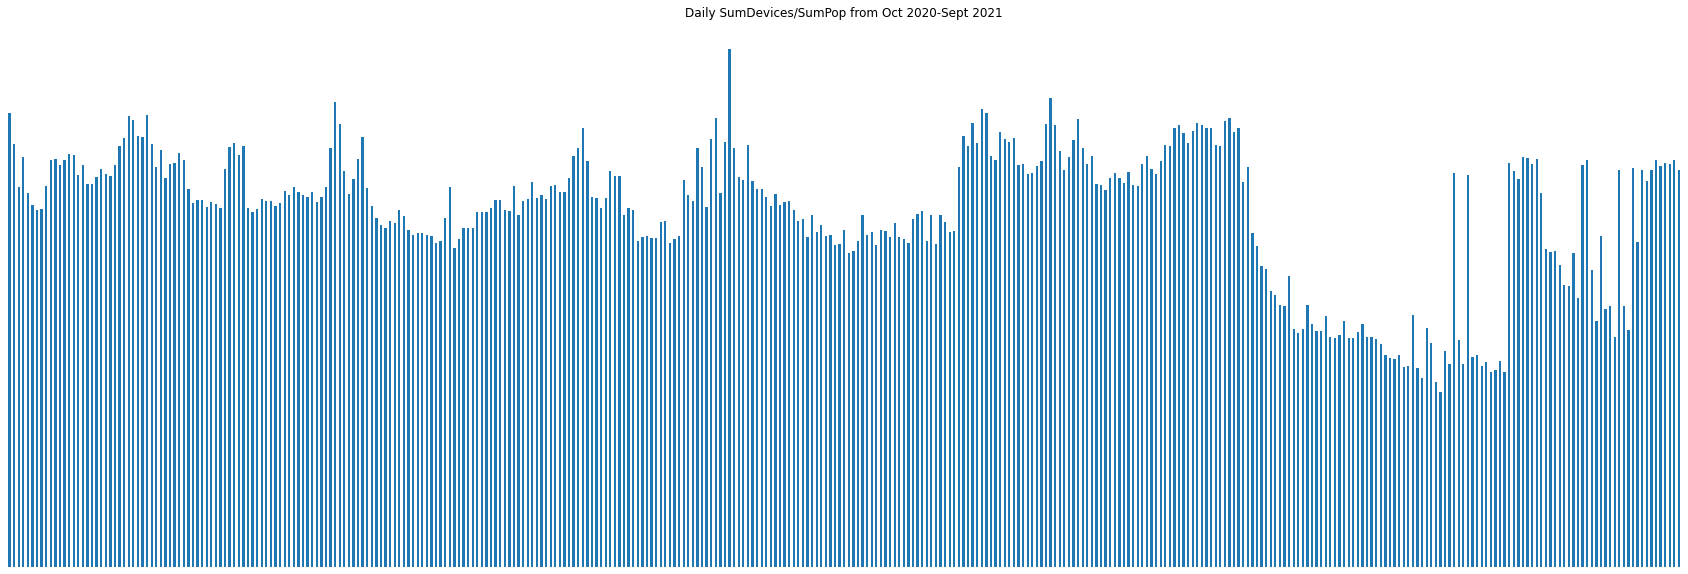

In [71]:
ax = visits_df['SumPop/SumDevices'].plot.bar(figsize=(30, 10),title='Daily SumDevices/SumPop from Oct 2020-Sept 2021')
ax.axis('off')